**Let's start by loading the required packages,
reading the data into a pandas DataFrame-automatically identify missing values and checking the data**

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataframe = pd.read_csv('profiles.csv', na_values=['NA'])

In [5]:
dataframe.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


**let's see the column header**

In [6]:
list(dataframe)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

**printing out some summary statistics about the data set (only for the int columns)**

In [7]:
dataframe.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


**we see that 3 height entries are missing and the min of height is 1 which doesnt make any sense., and the min in income is -1 which contributes to all of the irregularities (-1).
lets try and fix this data up**

**lets look at the location first**

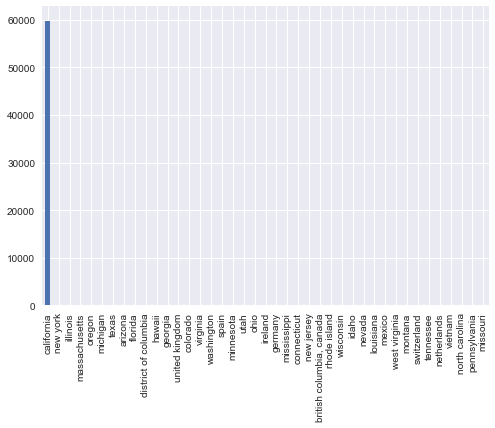

In [8]:
dataframe['location'].str.split(', ', 1).str[1].value_counts().plot(kind='bar')

**we can see that most of the data is from California. first of all in this kind of analysis its better to look at one state (one social, work environment), so lets get rid of all the data from other states and keep only the ones from California.**

In [9]:
df = dataframe[dataframe['location'].str.split(', ', 1).str[1] == "california"]

In [10]:
df['location'].str.split(', ', 1).str[1].value_counts()

california    59855
Name: location, dtype: int64

**lets deal with the first problem: the height problem and try to take only the possiable values**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

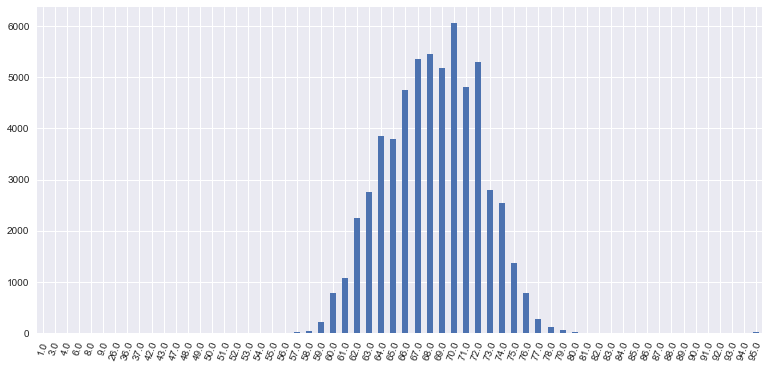

In [11]:
df['height'].value_counts().sort_index().plot(kind='bar', figsize=(13,6))
plt.xticks(rotation=70)

**we can see that we have a few strange values, the height was measured in inches, we can git rid of the few values that are really small, lets say below 30inch. we'll keep the highest values( we dont judge :) )**

In [12]:
df = df.loc[(df['height'] >= 30)]

In [13]:
df.describe()

,age,height,income
count,59846.000000,59846.000000,59846.000000
mean,32.344167,68.300672,20028.099455
std,9.455584,3.940012,97318.804658
min,18.000000,36.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


**the few values that we got rid of did not change our data dramaticlly, but ofc it's more reasonable now**

**second problem: the -1 in the income column **

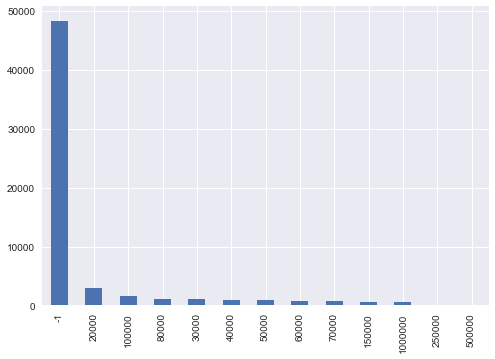

In [14]:
df['income'].value_counts().plot(kind='bar')

**we can see that the -1 value appeared too many times in the income column, if we drop them from the data it could potentially bias our analysis, One way to deal with this situation is mean imputation: If we know that the values for a measurement fall in a certain range, we can fill in the values with the average of that measurement. We should check the average in every city specifically. to do so I downloaded the average income in california's cities and filled the missing data. 
I failed in replacesing the data, so instead I just got rid of all the -1 values.**

In [15]:
dfna = df.copy()
dfna[dfna['income']==-1]=np.nan

In [16]:
dfna.dropna(subset=['income'],inplace=True)

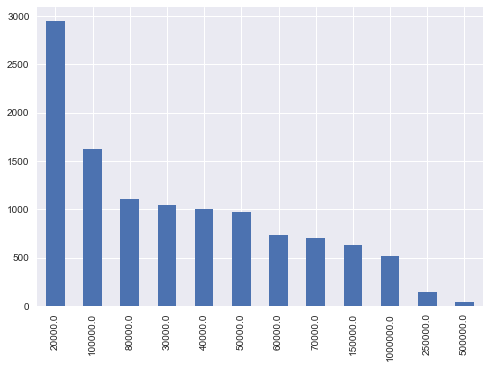

In [17]:
dfna['income'].value_counts().plot(kind='bar')

In [18]:
dfna.describe()

,age,height,income
count,11486.000000,11486.000000,11486.000000
mean,32.470399,69.116664,104357.478670
std,9.749851,3.891628,201368.113046
min,18.000000,36.000000,20000.000000
25%,25.000000,67.000000,20000.000000
50%,30.000000,69.000000,50000.000000
75%,37.000000,72.000000,100000.000000
max,69.000000,95.000000,1000000.000000


**we already see that we have fewer number of data, but with reasonable statistics**

**I tried to see if there is a relationship between age, income and sex, but as you can see in the first graph there is none.
In the second graph we see a correlation between age, income and drinks, the more people are older the less they drink incomparisone to the younger people, and withen those young people we can see that the more the income the more they drink.**

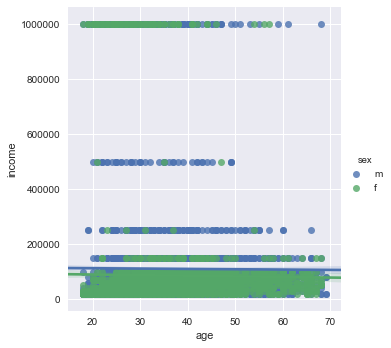

In [19]:
sns.lmplot('age','income',hue='sex',data=dfna,size=5)

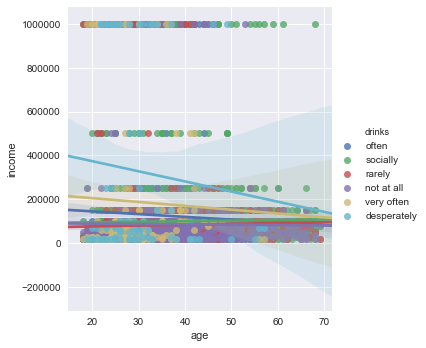

In [20]:
sns.lmplot('age','income',hue='drinks',data=dfna,size=5)

**boxplot of the distripution of income to age. we can see the the young control the edges of the income spectrum.**

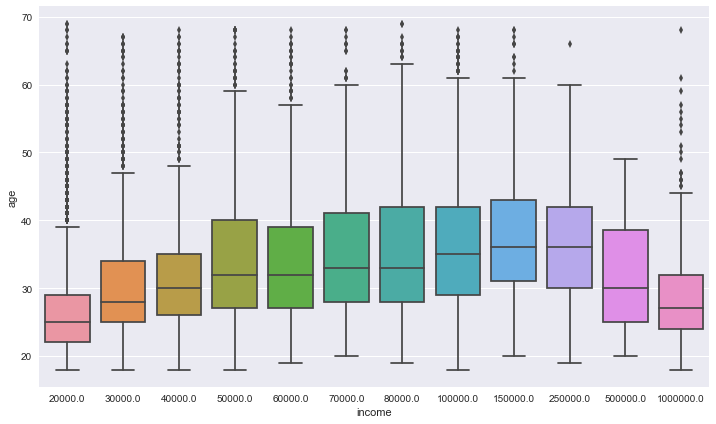

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='income',y='age',data=dfna)

**here I tried to show the ration between females and males in smoking, and we can see in the first graph that the males have the biggest part in most of the categories.
in the second graph we can see that from the start we have more interies of males than females.
so I choose randomly the number of females interies from the males data so we can see a good (almost good) ratio- (third graph), and we can see that the ratio has changed.**

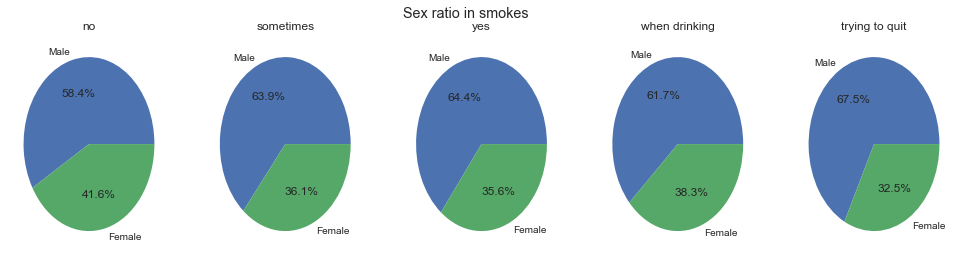

In [22]:
fig = plt.figure(figsize=(17,4))
fig.suptitle('Sex ratio in smokes')
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ans = ["no", "sometimes", "yes", "when drinking", "trying to quit"]
ax = [ax1, ax2, ax3, ax4, ax5]
i = 0
while i < len(ans):
    smoke = df[df['smokes'] == ans[i]]
    smoke = df[df['smokes'] == ans[i]]
    labels = 'Male', 'Female'
    sizes = [len(smoke[smoke['sex']=='m']),len(smoke[smoke['sex']=='f'])]
    ax[i].pie(sizes, labels = labels, autopct = '%.1f%%')
    ax[i].title.set_text(ans[i])
    i += 1

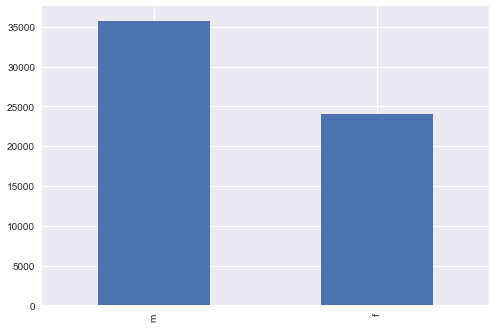

In [23]:
df['sex'].value_counts().plot(kind='bar')

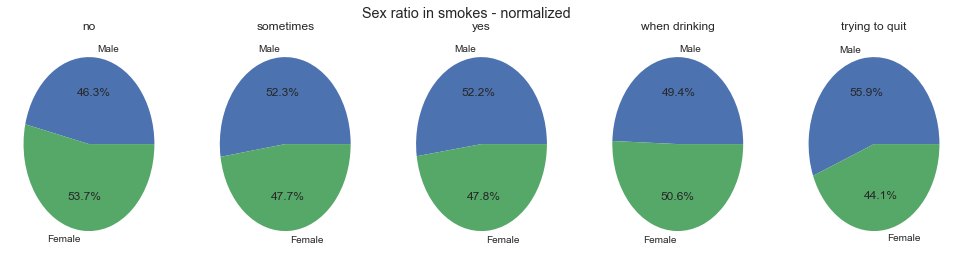

In [24]:
fig = plt.figure(figsize=(17,4))
fig.suptitle('Sex ratio in smokes - normalized')
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

f = df[df['sex']=='f']['smokes'].count()
dfm = df[df['sex']=='m'].sample(n=f)

ans = ["no", "sometimes", "yes", "when drinking", "trying to quit"]
ax = [ax1, ax2, ax3, ax4, ax5]
i = 0
while i < len(ans):
    smoke = df[df['smokes'] == ans[i]]
    smokem = dfm[dfm['smokes'] == ans[i]]
    labels = 'Male', 'Female'
    sizes = [len(smokem[smokem['sex']=='m']),len(smoke[smoke['sex']=='f'])]
    ax[i].pie(sizes, labels = labels, autopct = '%.1f%%')
    ax[i].title.set_text(ans[i])
    i += 1

**and here the same thing for drugs.**

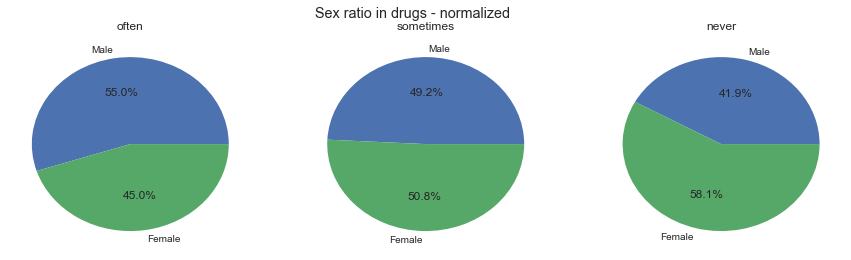

In [25]:
fig = plt.figure(figsize=(15,4))
fig.suptitle('Sex ratio in drugs - normalized')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

f = df[df['sex']=='f']['drugs'].count()
dfm = df[df['sex']=='m'].sample(n=f)

ans = ["often", "sometimes", "never"]
ax = [ax1, ax2, ax3]
i = 0
while i < len(ans):
    drugs = df[df['drugs'] == ans[i]]
    drugsm = dfm[dfm['drugs'] == ans[i]]
    labels = 'Male', 'Female'
    sizes = [len(drugsm[drugsm['sex']=='m']),len(drugs[drugs['sex']=='f'])]
    ax[i].pie(sizes, labels = labels, autopct = '%.1f%%')
    ax[i].title.set_text(ans[i])
    i += 1

**I tried seeing drinks, drugs and smokes over income, and we can see that there is pattern in all of the categories.**

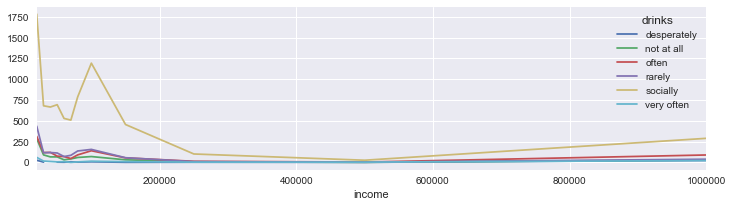

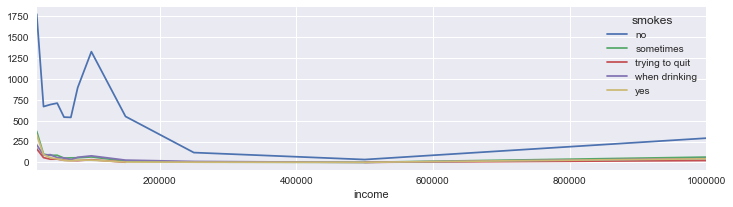

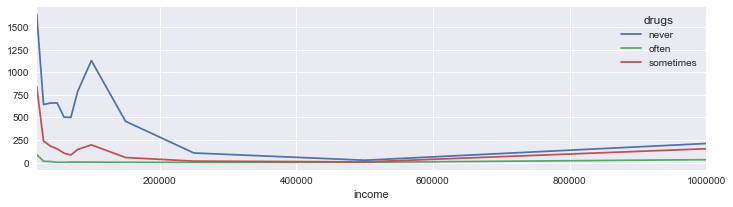

In [26]:
dfna.groupby(['income','drinks']).size().unstack().plot(figsize=(12,3))
dfna.groupby(['income','smokes']).size().unstack().plot(figsize=(12,3))
dfna.groupby(['income','drugs']).size().unstack().plot(figsize=(12,3))

**same thing but with age, and we also can see a pattern in all of them, the mid 20 have all the fun.**

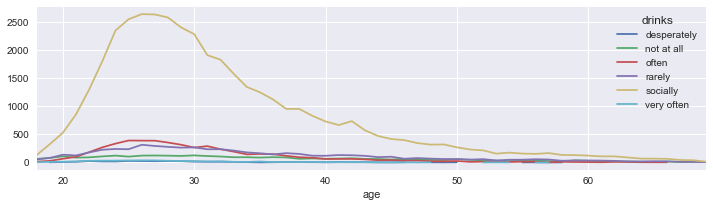

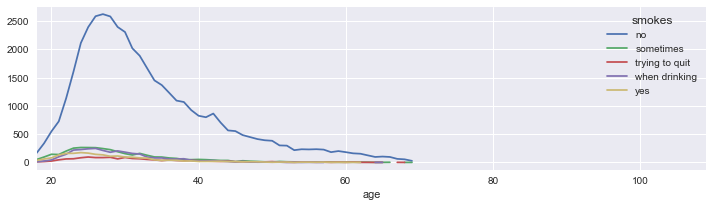

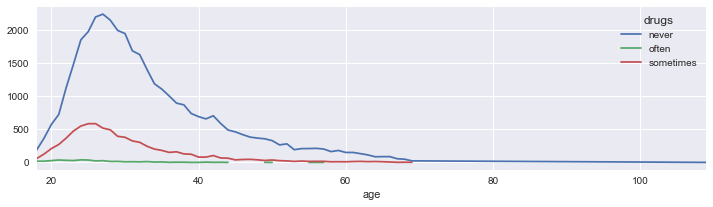

In [27]:
df.groupby(['age','drinks']).size().unstack().plot(figsize=(12,3))
df.groupby(['age','smokes']).size().unstack().plot(figsize=(12,3))
df.groupby(['age','drugs']).size().unstack().plot(figsize=(12,3))

**That's it for now.**